In [224]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix

In [225]:
df = pd.read_csv('forestfires.csv')
print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [226]:
df.month = (pd.factorize(df['month'])[0]).astype(float)
df.day = (pd.factorize(df['day'])[0]).astype(float)
df.X = df.X.astype(float)
df.Y = df.Y.astype(float)
df.RH = df.RH.astype(float)
print(df)

       X    Y  month  day  FFMC    DMC     DC   ISI  temp    RH  wind  rain  \
0    7.0  5.0    0.0  0.0  86.2   26.2   94.3   5.1   8.2  51.0   6.7   0.0   
1    7.0  4.0    1.0  1.0  90.6   35.4  669.1   6.7  18.0  33.0   0.9   0.0   
2    7.0  4.0    1.0  2.0  90.6   43.7  686.9   6.7  14.6  33.0   1.3   0.0   
3    8.0  6.0    0.0  0.0  91.7   33.3   77.5   9.0   8.3  97.0   4.0   0.2   
4    8.0  6.0    0.0  3.0  89.3   51.3  102.2   9.6  11.4  99.0   1.8   0.0   
..   ...  ...    ...  ...   ...    ...    ...   ...   ...   ...   ...   ...   
512  4.0  3.0    2.0  3.0  81.6   56.7  665.6   1.9  27.8  32.0   2.7   0.0   
513  2.0  4.0    2.0  3.0  81.6   56.7  665.6   1.9  21.9  71.0   5.8   0.0   
514  7.0  4.0    2.0  3.0  81.6   56.7  665.6   1.9  21.2  70.0   6.7   0.0   
515  1.0  4.0    2.0  2.0  94.4  146.0  614.7  11.3  25.6  42.0   4.0   0.0   
516  6.0  3.0   11.0  1.0  79.5    3.0  106.7   1.1  11.8  31.0   4.5   0.0   

      area  
0     0.00  
1     0.00  
2     0.00  

In [227]:
def statisticSignificance(x, y):
    stat, p = ttest_ind(x, y)
    return p

In [228]:
y = df.area > 0
X = df.drop(columns=['area'])
y.astype(float)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: area, Length: 517, dtype: float64

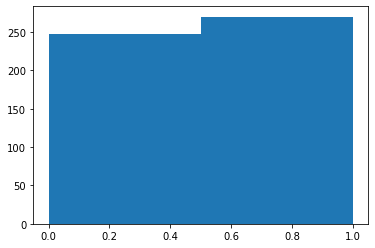

In [229]:
plt.hist(y.astype(float), bins=2)
plt.show()

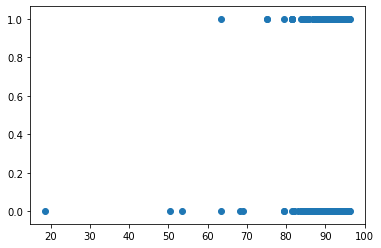

In [230]:
plt.scatter(X.FFMC,y)

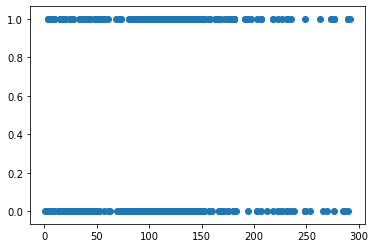

In [231]:
plt.scatter(X.DMC,y)

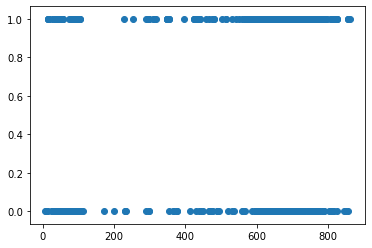

In [232]:
plt.scatter(X.DC,y)

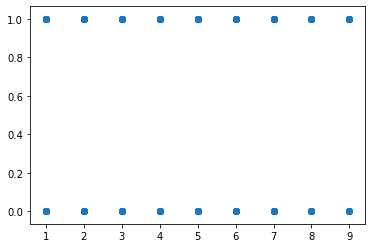

In [233]:
plt.scatter(X.X,y)

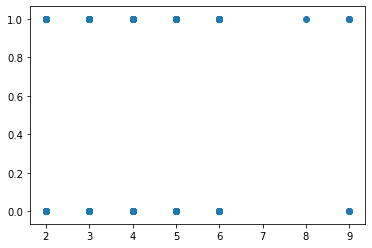

In [234]:
plt.scatter(X.Y,y)

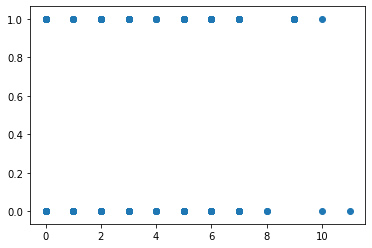

In [235]:
plt.scatter(X.month,y)

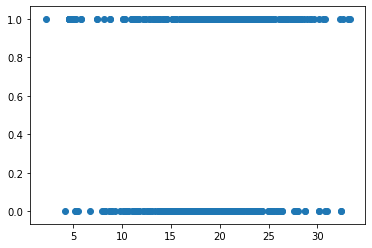

In [236]:
plt.scatter(X.temp,y)

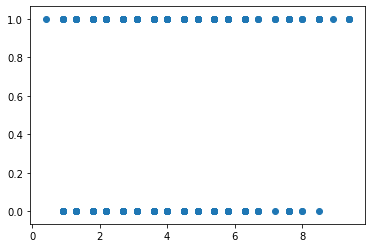

In [237]:
plt.scatter(X.wind,y)

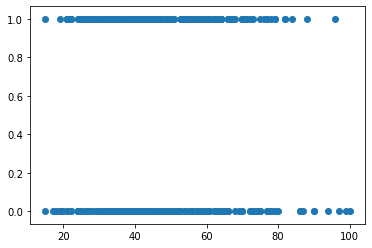

In [238]:
plt.scatter(X.RH,y)

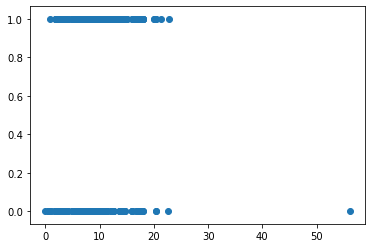

In [239]:
plt.scatter(X.ISI,y)

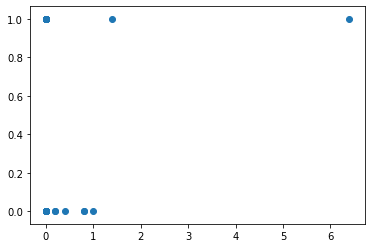

In [240]:
plt.scatter(X.rain,y)

In [241]:
p = []
for i in range(12):
    p.append(statisticSignificance(X.ix[:,i], y))
p

g:\py\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


[6.758642532122513e-211,
 0.0,
 6.357032271758441e-119,
 5.193394616099154e-115,
 0.0,
 2.132838983998588e-206,
 4.3036751697605095e-279,
 1.7530828018175565e-226,
 0.0,
 0.0,
 1.8070306145016729e-230,
 6.687843901995498e-73]

In [242]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [243]:
poly = PolynomialFeatures(4)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
X_valid = poly.fit_transform(x_valid)
X = poly.fit_transform(X)

In [244]:
clf = svm.SVC()
clf.fit(X_train, y_train)
svmPred = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.625


In [245]:
tn, fp, fn, tp = confusion_matrix(y_test, svmPred).ravel()
(tn, fp, fn, tp)

(16, 28, 11, 49)

Otrzymany model ma skuteczność na poziomie 62,5%. Wynik jest dosyć niski, jednak analizując macierz błędów można stwierdzić, iż może być on przydatny w zadaniu zapobiegania pożarom, ponieważ w badanej próbie jest stosunkowo niewiele błędnych wskazań o braku pożaru.

Ma to między innymi związek z niewielkim rozmiarem zbioru danych oraz mało wyrażnym wpływem poszczególnych parametrów na obecność pożarów co można zauważyć na wykresach.

Regresyjne przewidywanie powierzchni pożaru byłoby zadaniem znacznie trudniejszym, ponieważ w badanym zbiorze było bardzo niewiele przypadków pożarów o dużej powierzchni.